In [ ]:
#我的目标是下面这个问题：
#给一个OU过程，怎么最有效率的估计μ?
#均值是可以的，但它足够好吗？它漏掉信息了，一阶差分是有额外信息的
#那最优策略又是什么？

In [ ]:
#假设检验：
#假设分为两种：
#原假设H0
#备择假设H1
#一般来说，我们主要是将选择分为：
#拒绝原假设
#没有充分理由拒绝原假设，并不等于”接受原假设“，无罪推定
#我们引入假设检验的两类错误：弃真错误和纳伪错误。
#弃真错误 P(reject H0 | H0 is true)
#纳伪错误 P(not reject H0 | H0 is false)
#两类错误此消彼长
#当P(reject H0 | H0 is true)<α=0.05,0.01, 我们就拒绝原假设。
#拒绝域：P(reject H0|H0 is true)<α 的参数的取值范围

In [ ]:
#再specify
#给定OU，给定σ，给定θ，给定T，给定dt，现在有N=T/dt个数据点
#我怎么找到 μ 的UMVUE？

In [ ]:
#P(D|θ)=P(X1...XN|θ)=P(X1=x1...XN=xN|θ=θ)
#P(X1|θ)*P(X2|X1,θ)...*P(XN|X1,X2...Xₙ₋₁,θ)
#P(X1|θ)*P(X2|X1,θ)...*P(Xₙ|Xₙ₋₁,θ),马尔可夫性
#dXt=-Θ*(Xt-μ)*dt+σ*dWt
#P(X2|X1,θ)=P(ΔX=X2-X1=-Θ*(X1-μ)*Δt+σ*dWt|X1,θ)
#P([X2-X1+Θ*(X1-μ)*Δt/σ]=dWt|X1,θ)
#dWt是方差dt的正太
#P([X2-X1+Θ*(X1-μ)*dt/(σ√dt)]=N | X1,θ)
#P(N在[X2-X1+Θ*(X1-μ)*dt/(σ√dt)]～[X2+dX2-X1+Θ*(X1-μ)*dt/(σ√dt)])
#1/(σ√dt)*φ([dX/dt]+[Θ/σ*(X-μ)*√dt])

#X1～N(μ,σ^2/2θ)
#P(X1|θ)=√(2θ)/σ*φ(√(2θ)/σ*(X-μ))
#所以
#P(D|θ)=C*φ(√(2θ)/σ*(X1-μ))*φ([dX/√dt/σ]+[Θ/σ*(X-μ)*√dt])'s
#P(D|θ)=C*exp(-θ/σ²*(X1-μ)²)*exp(-[dX/√dt/σ+Θ/σ*(X-μ)*√dt]²/2)
#log P(D|θ)=C-θ/σ²*(X1-μ)²-[dX/√dt/σ+Θ/σ*(X-μ)*√dt]²/2
#min θ/σ²*(X1-μ)²+[dX/√dt/σ+Θ/σ*(X-μ)*√dt]²/2
#平方项系数：θ/σ²+Θ²/σ²*T/2
#一次项系数：-2*X1*θ/σ²-Θ²/σ²*dt*X-Θ/σ²*dX
#一次项系数：-2*X1*θ/σ²-Θ²/σ²*T*𝔼X-Θ/σ²*dX
#一次项系数：-2*X1*θ/σ²-Θ²/σ²*T*𝔼X-Θ/σ²*(Xn-X1)
#一次项系数：-θ^2/σ^2*T*EX(1~n-1)-θ/σ^2*(X[end]+X[1])

#所以，当时间足够长，μ= 𝔼X
#这里做的是极大似然估计
#但显然这个结果不好，吗
#来模拟一下

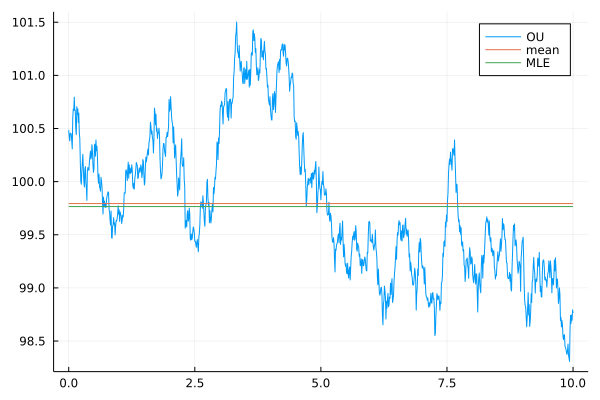

In [61]:
using DifferentialEquations
using Plots
using Statistics
global θ=1.0
global σ=1.0
global μ=100.0
global dt=0.01
global T0=0.0
global T=10.0

X_before=OrnsteinUhlenbeckProcess(θ,μ,σ,T0,μ)
X_before.dt=dt
calculate_step!(X_before,dt,nothing,nothing)
for t in dt:dt:T
    accept_step!(X_before,dt,nothing,nothing)
end

X=OrnsteinUhlenbeckProcess(θ,μ,σ,T0,X_before.u[end])
X.dt=dt
calculate_step!(X,dt,nothing,nothing)
for t in dt:dt:T
    accept_step!(X,dt,nothing,nothing)
end
plot(X.t,X.u,label="OU")
EX=mean(X.u)
plot!(X.t,fill(EX,length(X.u)),label="mean")
a=θ^2/σ^2*T/2+θ/σ^2
b=-θ^2/σ^2*T*EX-θ/σ^2*(X[end]+X[1])
MLE=-b/(2*a)
MLE = (EX + (X[end]+X[1])/(θ*T) ) / (1 + 2/(θ*T) )
plot!(X.t,fill(MLE,length(X.u)),label="MLE")

In [ ]:
#找充分统计量
#log p(D|θ)=C-θ/σ²*(X1-μ)²-[dX/(σ√dt)+Θ/σ*(X-μ)*√dt]²/2 = g(T(X's),μ)+h(X's)
#a=θ/σ^2+θ^2/σ^2*T/2 和 X 无关
#b=-θ^2/σ^2*T*EX-θ/σ^2*(X[end]+X[1])
#g = aμ^2+bμ
#所以充分统计量是b
#也就是 T(Xi) = (EX + (X[end]+X[1])/(θ*T) )
#一般几个参数就有几个充分统计量

In [ ]:
#极小充分统计量
#似然比无关定理
#设样本联合密度函数为f(x;θ)，如果f(x;θ)/f(y;θ)与θ无关的充要条件为T(x)=T(y)，且T充分，那么 T一定极小充分
#在我这是log p(D1|θ)-log p(D2|θ)
#(b1-b2)*μ
#充要条件是b1=b2
#b是极小的
#T是极小的,记做 μ̂

In [66]:
#UMVUE一致最小方差无偏估计
#完备统计量 T=T(X1...Xn)
#如果 ∀可测g,都有：{ { ∀μ,X~Pμ, 𝔼(g(T))=0 } → P(g(T)=0)=1 }, 则称T是完备统计量
#现在回来，∫(给定μ)g(EX + (X[end]+X[1])/(θ*T))=0,∀μ
#看看g必须有什么性质
#比如对两点分布，g是关于参数的多项式，所以必须是0, g=0 a.e.
#P(D|θ)=C*exp(-aμ^2-b(X)μ)=C*exp(-a(μ̂-μ)^2)
#∫(给定μ) g(μ̂(X))*exp(-a(μ̂-μ)^2)*dX1dX2...dXn = 0
#我们设现在μ̂(X)的分布函数是f(μ̂;μ),是已知的
#换句话说，要证μ̂是完备的，我们必须知道在给定的μ下，μ̂的分布是什么
#实际上现在分布族和参数的维数一样
#∫g(μ̂)*f(μ̂;μ)*db=0,∀μ
#方法是用积分变换,拉普拉斯
#本质是从样本空间到参数空间的一个变换
#把f(μ̂;μ)看成kernel，这个kernel引出的变换具不具有一一对应的性质
#∫g(μ̂)*f(μ̂;μ)*dμ̂=ϕ(μ)
#从ϕ(μ)=0能不能推出g(μ̂)=0（ae意义下）
#https://blog.csdn.net/weixin_44207974/article/details/107011546

In [ ]:
#知道 p(X1...Xn;μ)=C*exp(-a(μ̂-μ)^2)
#f(μ̂;μ)=∫p(X1...Xn;μ)δ(μ̂-μ̂(X))dX1...dXn
#f(μ̂;μ)=∫C*exp(-a(μ̂(X)-μ)^2)δ(μ̂(X)-μ̂)dX1...dXn
#μ̂是X1...Xn的线性组合,系数和μ无关
#f(μ̂;μ)=C*exp(-a(μ̂-μ)^2)
#所以变换核是exp(-a(μ̂-μ)^2)

In [ ]:
#已知∫g(μ̂)*exp(-a(μ̂-μ)^2)*dμ̂=0,∀μ，想证g=0
#有一个移动的窗口去“测试”g的值
#∫[g(μ̂)*exp(-aμ̂^2)]exp(-2aμ̂μ)*dμ̂=0
#把前两项捆一起
#是拉普拉斯变换
#指数族定理
#下面是实变
#https://www.math.mcgill.ca/dstephens/OldCourses/557-2008/Handouts/Math557-02aComplete.pdf

In [ ]:
#∫g(θ̂)exp(θθ̂)*dθ̂=0
#分成g+，g-
#于是不妨g>0
#根本不是拉普拉斯变换，是矩生成函数：MGF
#Mₓ(t)=𝔼eᵗˣ
#Proof that moment generating functions uniquely determine probability distributions
# 怎么证明 M 蕴含了所有信息？？？？？
#https://stats.stackexchange.com/questions/34956/proof-that-moment-generating-functions-uniquely-determine-probability-distributi

In [ ]:
# Uniqueness Theorem. 
# If there exists 𝛿>0 such that 𝑀𝑋(𝑡)=𝑀𝑌(𝑡)<∞ for all t∈(−𝛿,𝛿), then 𝐹𝑋(𝑡)=𝐹𝑌(𝑡) for all t∈ℝ.
# https://stats.stackexchange.com/questions/34956/proof-that-moment-generating-functions-uniquely-determine-probability-distributi

In [ ]:
# Lehmann-Scheffe Theorem
# Y是完备充分统计量
# 如果φ(Y)使得𝔼φ(Y)=θ
# then φ(Y) is the unique MVUE of θ
# 也就是说，如果θ̂是完备充分统计量，且是无偏估计，那它就是方差最小的估计

In [ ]:
# 所以EX就已经是最好的估计了
# 在T足够大，dt足够小的情况